# Prediction Using supervised ML

### Sparks Foundation

## Task 1: Supervised ML

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
#importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### About the Dataset

In [16]:
df.shape

(25, 2)

In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Hours', ylabel='Scores'>

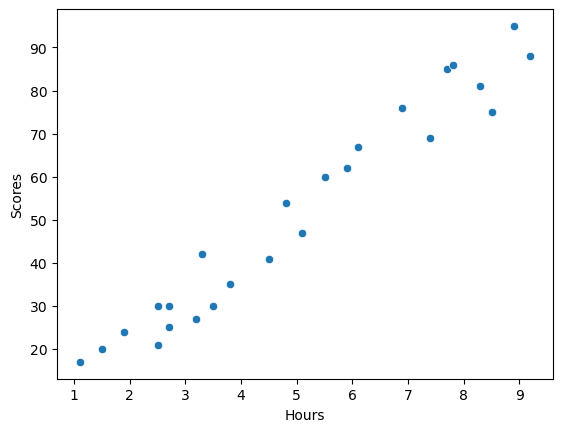

In [5]:
sns.scatterplot(data=df,x='Hours',y='Scores')

**We can see that there is a linear relations between the Hours and Scores**<br>
**The Scores increases with increase in Hours**

#### Model Building

In [31]:
X=df[['Hours']]
y=df['Scores']

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [33]:
# dimension of the datasets
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (20, 1)
X_test = (5, 1)
y_train = (20,)
y_test = (5,)


In [38]:
# Now will perform using Linear regression using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
lr=LinearRegression()
lr.fit(X_train,y_train)
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

#Now will check the MSE of the model
train_rmse=mean_squared_error(y_train,train_pred,squared=False)
test_rmse=mean_squared_error(y_test,test_pred,squared=False)
print('train_rmse =',train_rmse)
print('test_rmse =',test_rmse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_rmse = 5.608461065868858
test_rmse = 4.352380006653288
train_r2_score = 0.9491209376364416
test_r2_score = 0.9678055545167994


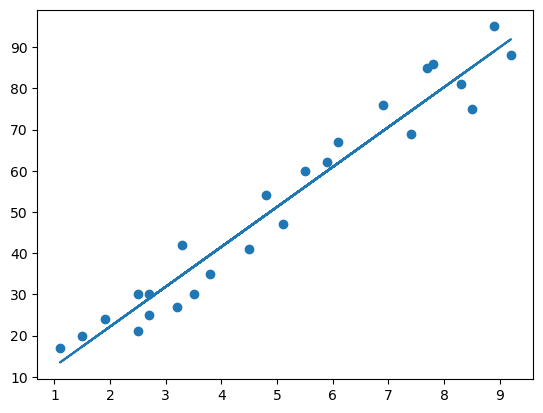

In [45]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

* The linear regression model has performed exceptionally well on both the training and testing datasets.
* The lower RMSE on the test set compared to the training set suggests that the model generalizes well to unseen data.
* The high R² scores for both training and testing sets indicate that the model effectively captures the relationship between the number of hours studied and the percentage of marks scored.
* Overall, the model is reliable and accurate for predicting students' scores based on their study hours.

In [47]:
testing = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})  
testing

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [52]:
hours = np.array([[9.5]])
predicted_score = lr.predict(hours)
print(f"Predicted score for 9.5 hours of study: {round(predicted_score[0],2)}")

Predicted score for 9.5 hours of study: 94.81


#### The Predicted score if a student studies for 9.5 hrs/day is 94.81 %